In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [4]:
# Representation of real and complex part of TDSE

A = 1
x0 = 0
sigma_x = 5
k0 = 3
t = 0
w0 = 2



def real_psi(A, x0, sigma_x, k0, w0, x, t):
    return A*np.exp(-(x-x0)**2/(2*sigma_x**2))*np.cos(k0*x-w0*t)

def imaginary_psi(A, x0, sigma_x, k0, w0, x, t):
    return A*np.exp(-(x-x0)**2/(2*sigma_x**2))*np.sin(k0*x-w0*t)

def dens_prob(A, x0, sigma_x, x):
    return A**2*np.exp(-(x-x0)**2/(sigma_x**2))


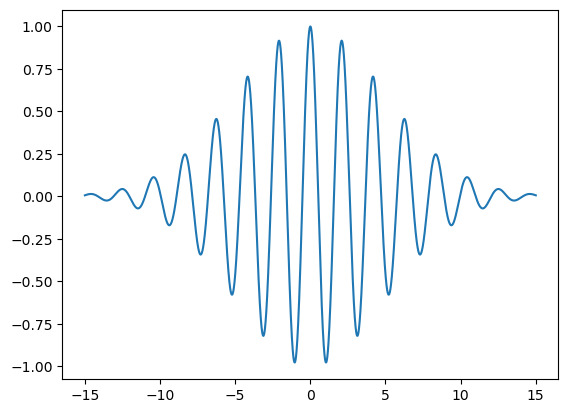

In [5]:
# Plot of Real part

x = np.linspace(-15,15, 10000)

plt.plot(x, real_psi(A, x0, sigma_x, k0, w0, x, t))

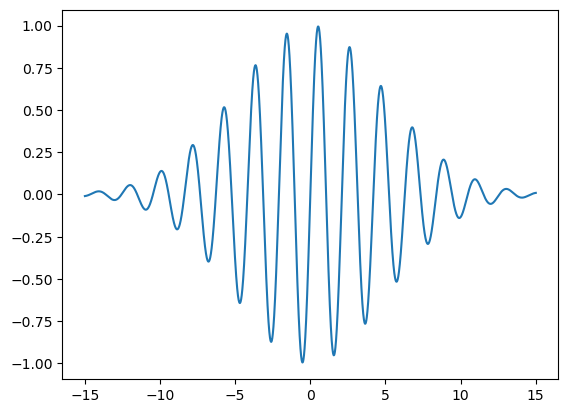

In [6]:
# Imaginary part

# Plot of Real part

x = np.linspace(-15,15, 10000)

plt.plot(x, imaginary_psi(A, x0, sigma_x, k0, w0, x, t))

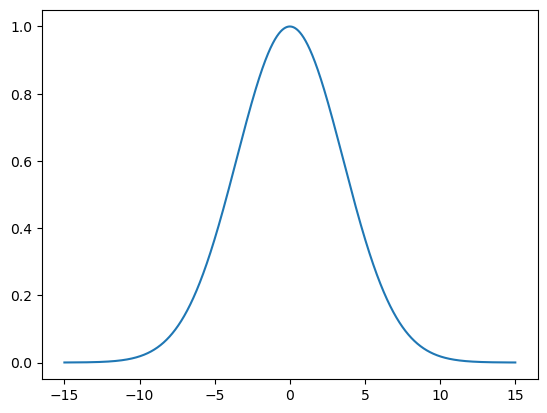

In [7]:
# Density probability

x = np.linspace(-15,15, 10000)

plt.plot(x, dens_prob(A, x0, sigma_x, x))

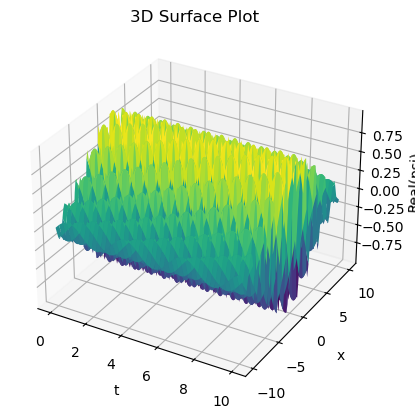

In [8]:
# Plot of real part dependent of t.

t = np.linspace(0, 10, 1000)
x = np.linspace(-10,10, 100)

# Create a 2D grid
T, X = np.meshgrid(t, x)

# Create a figure and a 3D axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(T, X, real_psi(A, x0, sigma_x, k0, w0, X, T),cmap='viridis')

# Set labels and title
ax.set_xlabel('t')
ax.set_ylabel('x')
ax.set_zlabel('Real(psi)')
ax.set_title('3D Surface Plot')

# Show the plot
plt.show()

In [14]:
from numba import njit

def norm(psiI,psiR):
    return np.sum(abs(psiI)**2 + abs(psiR)**2) 

@njit
def integrator(psiR, psiR_aux, psiI, psiI_aux):
    h_bar = 1
    m = 1
    dt = 1e-6
    dx = 0.2
    L = 100
    Xsteps = int(L/dx)
    
    # Store values in aux arrays


    factor = dt*h_bar/(2*m)

    psiR_aux = np.copy(psiR)
    psiI_aux = np.copy(psiI)

    for j in range(1,Xsteps-1):

        psiR[j] = psiR_aux[j] - factor*(psiI_aux[j+1]-2*psiI_aux[j]+psiI_aux[j-1]) / dx**2
        psiI[j] = psiI_aux[j] + factor*(psiR_aux[j+1]-2*psiR_aux[j]+psiR_aux[j-1]) / dx**2
        
    return psiR, psiI, psiR_aux, psiI_aux


In [27]:
# T + dt

# Equation of motion of real part and imaginary part
dt = 1e-4
dx = 0.1
m = 1
h_bar = 1
L = 100
sigma_x = 5
w = 2
k0 = 3
x0 = -20

A = 1 / (2*np.pi*sigma_x**2)**0.25
tfinal = 100

Tsteps = int(tfinal/dt)
Xsteps = int(L/dx) + 1
print(Tsteps)               # Number of steps: 10000000
Tsteps = 10000
#----------------Inicialització dels paquets d'ones----------------

x = np.linspace(-L/2, L/2, Xsteps+1)       # Vector de posicions, de -L/2 a L/2 amb pas dx

print('len(x)', len(x))


psiR = np.zeros(len(x))                # Inicialitzem els vectors de la part real i imaginària                     

print('len(psiR)', len(psiR))

psiI = np.zeros(len(x)) 

psiR_aux = np.zeros(len(x))             # Inicialitzem els vectors auxiliars de la part real i imaginària
psiI_aux = np.zeros(len(x))             # per a guardar els valors de la iteració anterior

# Psi at t = 0
psiR = real_psi(A, x0, sigma_x, k0, w0, x, t)
psiI = imaginary_psi(A, x0, sigma_x, k0, w0, x, t)

# Initial conditions
psiR[0] = 0.                # Psi is 0 at the borders. 
psiR[-1] = 0.
psiI[0] = 0.
psiI[-1] = 0.

psiR_0 = psiR
psiI_0 = psiI

# Plot initial conditions:
plt.figure()
plt.title('Initial conditions')
plt.plot(x, psiR,label='psi_Re')
plt.plot(x, psiI, label='psi_Im')
plt.legend()

# Time Evolution

psiR_aux = psiR
psiI_aux = psiI

norma = []


#for t in range(0,Tsteps):

for i in range(0,Tsteps):

    #for j in range(1,Xsteps-1):

    psiR, psiI, psiR_aux, psiI_aux = integrator(psiR, psiR_aux, psiI, psiI_aux)
    
    norma.append(norm(psiI, psiR))
    #print(i)

print('len(norma)',len(norma))


# Save the data to a file
time = np.linspace(0, Tsteps,Tsteps)
data = np.column_stack((time, norma))

# Save the data to a file
np.savetxt('output.txt', data, delimiter='\t', header='time\tnorma', comments='')

print('len(x)', len(x))

norma = np.round(norma)

plt.figure()
plt.plot(time, norma)


plt.figure()
plt.plot(x, psiR,label='psi_Re')
plt.plot(x, psiI, label='psi_Im')
plt.plot(x, psiR_0, label='psi_Im')
plt.plot(x, psiI_0, label='psi_Im')
plt.legend()


# Euler integration.





            #do i = 2, Nx-1
            #    psiR(i) = psiR_aux(i) - fact*(psiI_aux(i+1) - 2*psiI_aux(i) + psiI_aux(i-1)) + V(i)*dt*psiI_aux(i)
            #    psiI(i) = psiI_aux(i) + fact*(psiR_aux(i+1) - 2*psiR_aux(i) + psiR_aux(i-1)) - V(i)*dt*psiR_aux(i)
            #end do 




1000000
len(x) 1002
len(psiR) 1002


ValueError: operands could not be broadcast together with shapes (1002,) (1000,) 

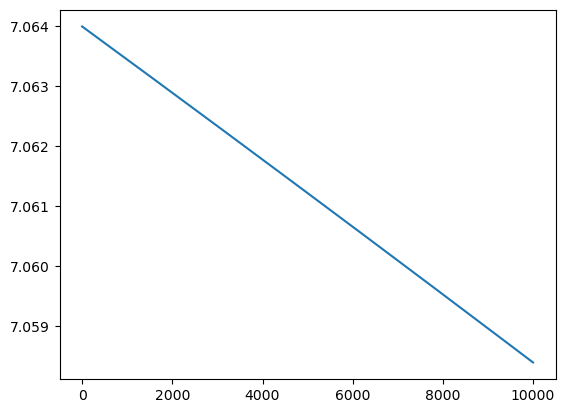

In [16]:
import os 


data = np.loadtxt('./output.txt', skiprows=1)

plt.plot(data[:,0],data[:,1])